## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Load the dataset

In [97]:
try:
    df = pd.read_csv('tips.csv')
except FileNotFoundError: # if file path is invalid of the file does not exist
    print("File not found.")
except pd.errors.EmptyDataError: # if the file is empty or has no data
    print("No data")
except pd.errors.ParserError: # if the file has malformed or invalid data that cannot be parsed.
    print("Parse error")
except UnicodeDecodeError: # if the file has a different encoding than the default or specified one.
    print("Encoding error")
except Exception: # handling other exceptions
    print("Error encountered! Please review your code")

In [98]:
## first 10 rows of the dataset

df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [4]:
## shape of the dataset

df.shape

(244, 7)

In [5]:
## name of each column

df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [7]:
## number of unqiue rows in each column (nunique)

df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [8]:
## information about each feature such as no. of samples(rows), no. of columns along with 
##their data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


no missing values as seen from non_null count

### 1. Make a list of categorical and numerical columns in the data.

In [9]:
# getting all numerical columns 
numercial_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()
print('List of Numerical Columns :', numercial_columns)

# getting all categorical columns 
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print('List of Categorical Columns :', categorical_columns)

List of Numerical Columns : ['total_bill', 'tip', 'size']
List of Categorical Columns : ['sex', 'smoker', 'day', 'time']


In [18]:
# other method : initialize 2 empty list for categorical and numerical columns respectively. Iterate through the list of 
# columns in the dataframe and check if the column type is object or numberical
cat=[]
num=[]
for i in df.columns:
    if df[i].dtypes == 'object':
        cat.append(i)
    else:
        num.append(i)
print('List of Categorical Columns :', cat)
print('List of Numerical Columns :', num)

List of Categorical Columns : ['sex', 'smoker', 'day', 'time']
List of Numerical Columns : ['total_bill', 'tip', 'size']


### 2. Compute the average bill amount for each day.

In [10]:
average_bill_amount = df.groupby('day')['total_bill'].mean()
print('Average bill amount for each day :\n',average_bill_amount)

Average bill amount for each day :
 day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64


### 3. Which gender is more generous in giving tips?

In [17]:
average_tip_by_gender = df.groupby('sex')['tip'].mean()

print("Average tip amount by gender:")
print(average_tip_by_gender)

# Compare the values of the output
if average_tip_by_gender.loc['Male'] > average_tip_by_gender.loc['Female']:
    print("\nIt can be seen from the above data that Males are more generous in giving tips")
    
elif average_tip_by_gender.loc['Male'] < average_tip_by_gender.loc['Female']:
    print("\nIt can be seen from the above data that Females are more generous in giving tips")
    
else:
    print("""\nIt can be seen from the above data that Males and Females are equally generous 
    in giving tips""")

Average tip amount by gender:
sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

It can be seen from the above data that Males are more generous in giving tips


### 4. According to the data, were there more customers for dinner or lunch?

In [18]:
customers_by_time = df.groupby('time')['size'].sum()

print("Number of customers for each meal time:")
print(customers_by_time)

# Compare the values of the output Series
if customers_by_time.loc['Dinner'] > customers_by_time.loc['Lunch']:
    print('\nSo, we can see more customers come for dinner')
    
elif customers_by_time.loc['Lunch'] > customers_by_time.loc['Dinner']:
    print('\nSo, we can see more customers come for Lunch')
    
else:
    print("""\nIt can be seen from the above data that the number of customer who come for lunch
    and dinner are same""")

Number of customers for each meal time:
time
Dinner    463
Lunch     164
Name: size, dtype: int64

So, we can see more customers come for dinner


### 5. Based on the statistical summary, comment on the variable 'tip'

In [27]:
# let us take a statistical summary for tip variable
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

### Comments on 'tip' variable

- Overall, the statistical summary suggests that the tips fall within the range of 1.00 to 10.00, with the average tip being around 3.00.

- A notable portion of tips are between 2.00 and 4.00 as seen from the 1st quartile(25%), 2nd quartile(50%), 3rd quartile(75%) which suggests there is possibility of outliers in the tip data 

- Customers pay about 1.4 dollars more or less than the average tipping amount as indicated by the standard deviation, suggesting some variability in tipping behavior.

### 6. Find the busiest day in terms of the orders?

In [19]:

# Count the number of orders for each day
orders_by_day = df['day'].value_counts()

# Find the busiest day
busiest_day = orders_by_day.idxmax()

print("Busiest day in terms of orders:",busiest_day)

Busiest day in terms of orders: Sat


### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

The skew for total_bill attribute :  1.1332130376158205
The plot for total_bill attribute :


Text(0.5, 1.0, 'Skewness of total_bill')

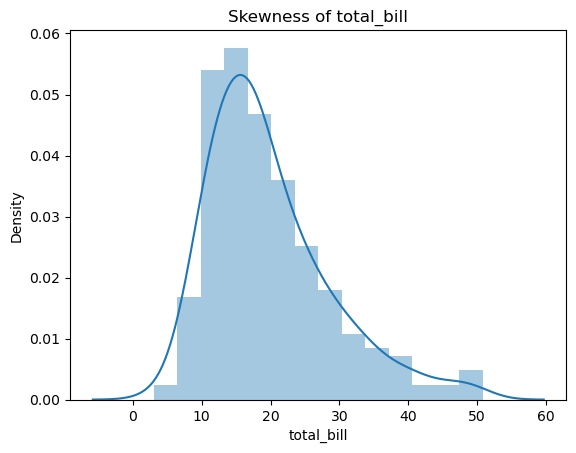

In [45]:
# getting the skew for 'total_bill' column
total_bill_skew = df['total_bill'].skew()
print('The skew for total_bill attribute : ',total_bill_skew)

# plot for total_bill attribute 
print('The plot for total_bill attribute :')
sns.distplot(df['total_bill'])
plt.title('Skewness of total_bill')

- The attribute has positive skewness, since the value of skewness for the attribute is positive. This is also supported by the plot as the right tail is longer which indicates right-skewed distribution

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

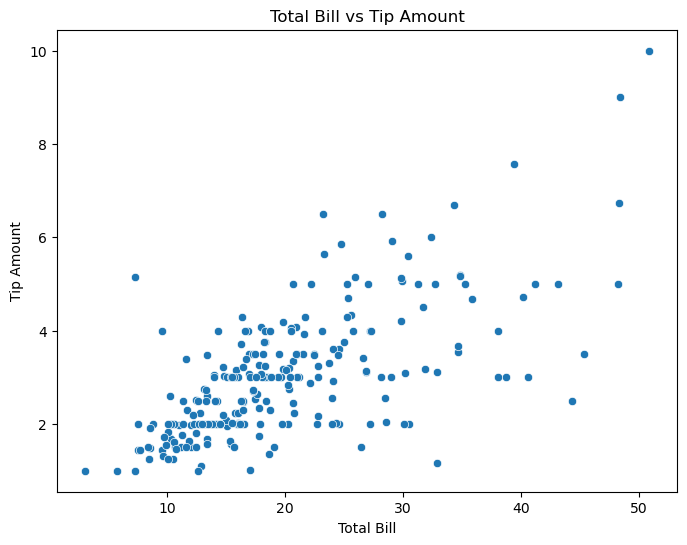

Correlation between the 2 attributes : 


,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [40]:
# Plot a scatter plot of 'total_bill' vs 'tip'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='total_bill', y='tip')
plt.title("Total Bill vs Tip Amount")
plt.xlabel("Total Bill")
plt.ylabel("Tip Amount")
plt.show()

# correlation matrix of tips and total_bill
print('Correlation between the 2 attributes : ')
df[['total_bill', 'tip']].corr()

### Findings:

- From the scatter plot and the correlation matrix, we can observe a generally positive trend between the total bill and tip amount, indicating that as the total bill increases, the tip amount tends to increase as well.

### 9. What is the percentage of males and females in the dataset? and display it in the plot

The percentage of males and females in the dataset : 
 sex
Male      64.344262
Female    35.655738
Name: proportion, dtype: float64


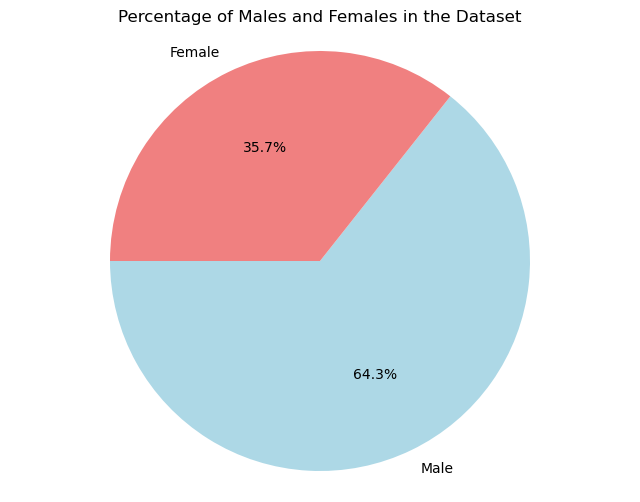

In [34]:
percentage_of_males_and_females = df['sex'].value_counts(normalize=True)*100
print("The percentage of males and females in the dataset : \n", percentage_of_males_and_females)

# plot displating the percentage of males and females in the dataset

labels = 'Male', 'Female'
sizes = [ percentage_of_males_and_females.loc['Male'], percentage_of_males_and_females.loc['Female'] ]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(8, 6))

plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', startangle=180)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Males and Females in the Dataset')
plt.show()

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [42]:
# to compute this, we can take a crosstab of the 2 attributes
smoking_habits_genderwise = pd.crosstab(df['sex'], df['smoker'])
print('The gender-wise count based on smoking habits :')
smoking_habits_genderwise

The gender-wise count based on smoking habits :


smoker,No,Yes
sex,,
Female,54,33
Male,97,60


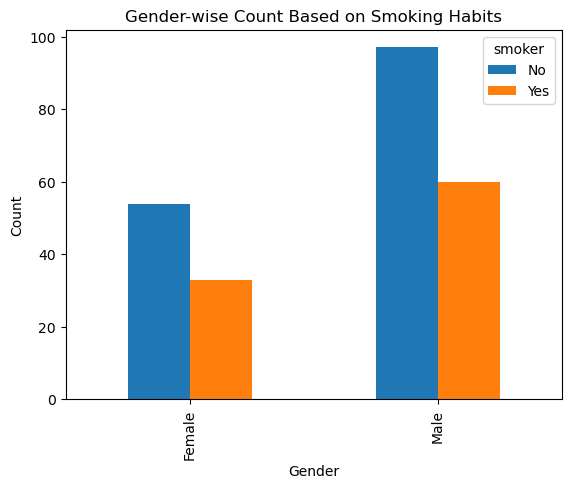

In [44]:
# plot 

smoking_habits_genderwise.plot(kind='bar')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender-wise Count Based on Smoking Habits")
plt.show()

### 11. Compute the average tip amount given for different days and display it in the plot.

The average tip amount given for different days :
 day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64


Text(0, 0.5, 'Tip Amount')

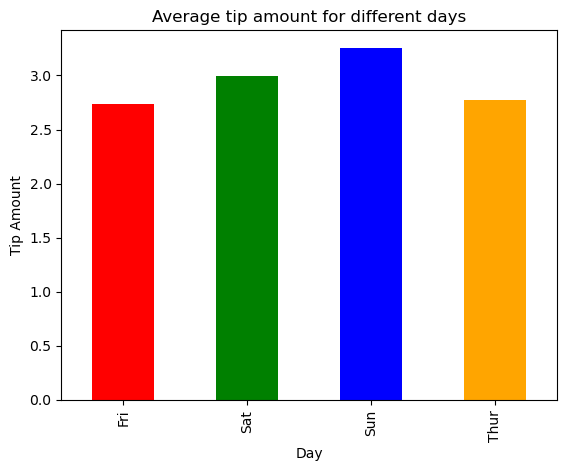

In [62]:
# computation
average_tipamt_perday = df.groupby('day')['tip'].mean()
print('The average tip amount given for different days :\n', average_tipamt_perday)

#plot
average_tipamt_perday.plot(kind='bar', color=['red', 'green', 'blue', 'orange'])
plt.title('Average tip amount for different days')
plt.xlabel('Day')
plt.ylabel('Tip Amount')

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

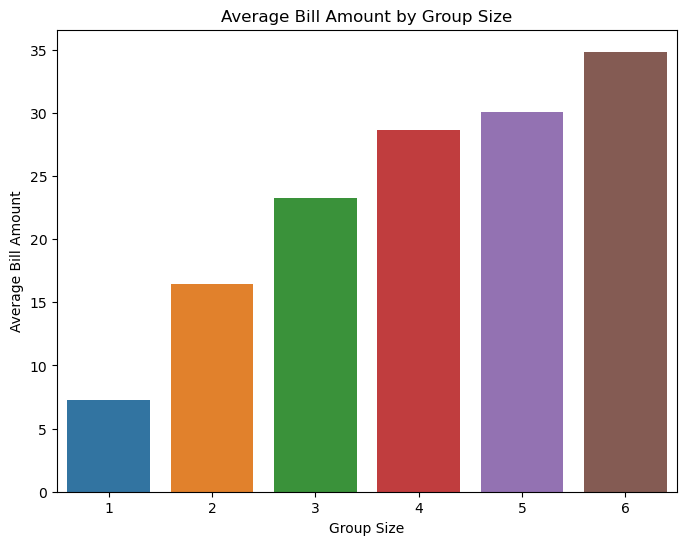

In [61]:
# Calculate the average bill amount for each group size
average_bill_by_size = df.groupby('size')['total_bill'].mean().reset_index()

# Plot a bar plot of 'size' vs average bill amount
plt.figure(figsize=(8, 6))
sns.barplot(data=average_bill_by_size, x='size', y='total_bill')
plt.title("Average Bill Amount by Group Size")
plt.xlabel("Group Size")
plt.ylabel("Average Bill Amount")
plt.show()

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

Text(0.5, 1.0, 'The bill amount based on gender')

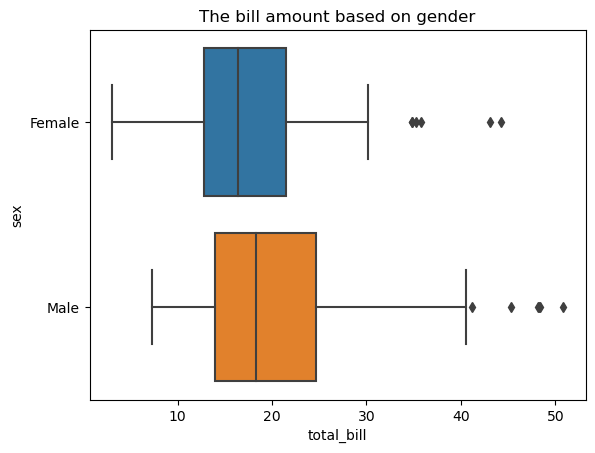

In [70]:
# plotting a horizontal box plot using seaborn library

sns.boxplot(x='total_bill', y='sex', data=df)
plt.title('The bill amount based on gender')

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [71]:
# Filter data for lunch and dinner on Saturday and Sunday
saturday_lunch = df[(df['day'] == 'Sat') & (df['time'] == 'Lunch')]
saturday_dinner = df[(df['day'] == 'Sat') & (df['time'] == 'Dinner')]
sunday_lunch = df[(df['day'] == 'Sun') & (df['time'] == 'Lunch')]
sunday_dinner = df[(df['day'] == 'Sun') & (df['time'] == 'Dinner')]

# Find the maximum bill amount for each category
max_bill_saturday_lunch = saturday_lunch['total_bill'].max()
max_bill_saturday_dinner = saturday_dinner['total_bill'].max()
max_bill_sunday_lunch = sunday_lunch['total_bill'].max()
max_bill_sunday_dinner = sunday_dinner['total_bill'].max()

print("Maximum bill amount for lunch on Saturday:", max_bill_saturday_lunch)
print("Maximum bill amount for dinner on Saturday:", max_bill_saturday_dinner)
print("Maximum bill amount for lunch on Sunday:", max_bill_sunday_lunch)
print("Maximum bill amount for dinner on Sunday:", max_bill_sunday_dinner)

Maximum bill amount for lunch on Saturday: nan
Maximum bill amount for dinner on Saturday: 50.81
Maximum bill amount for lunch on Sunday: nan
Maximum bill amount for dinner on Sunday: 48.17


- the nan values indicate that there was no lunch on saturday and sunday.

### 15. Compute the percentage of missing values in the dataset.

In [99]:
# this can be computed as follows : total missing values divided by the total no. of cells

df.isnull().sum()/df.shape[0]

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [100]:
print('Number of duplicate records : ')
len(df[df.duplicated()])

Number of duplicate records : 


1

In [101]:
df.drop_duplicates(inplace=True)

In [102]:
print('Number of duplicate records after deletion: ')
len(df[df.duplicated()])

Number of duplicate records after deletion: 


0

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

Text(0.5, 1.0, 'Box Plot of total_bill before outlier removal')

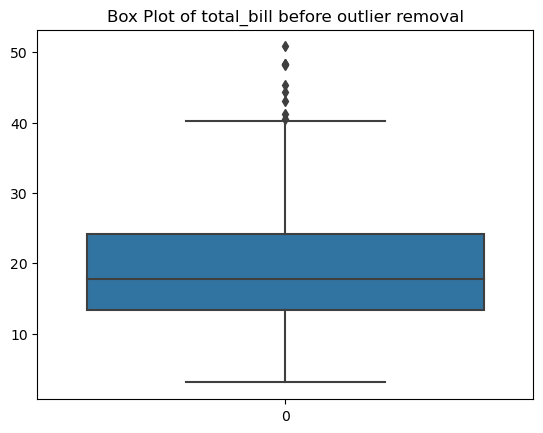

In [103]:
# box plot before outlier removal

sns.boxplot(df['total_bill'])
plt.title('Box Plot of total_bill before outlier removal')

- From the given box plot, we can s|ee that there are outliers in the 'total_bill' attribute
- we can remove these outliers using the log transform approach

In [104]:
# performing log transform on total_bill column

df["total_bill_tranformed"] = np.log(df["total_bill"])

Text(0.5, 1.0, 'Box Plot of total_bill after outlier removal')

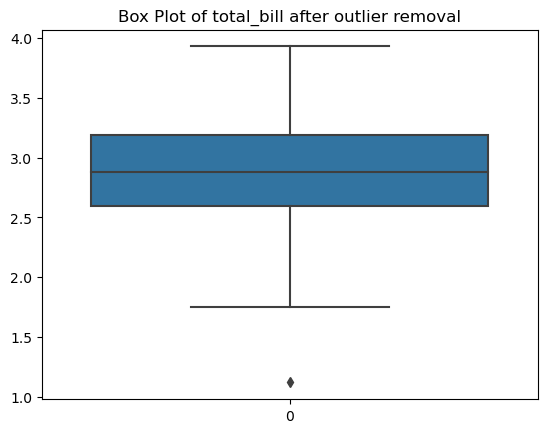

In [105]:
sns.boxplot(df['total_bill_tranformed'])
plt.title('Box Plot of total_bill after outlier removal')

- As we can see, almost all outliers are removed

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

Text(0.5, 1.0, 'Box Plot of "tip" before outlier removal')

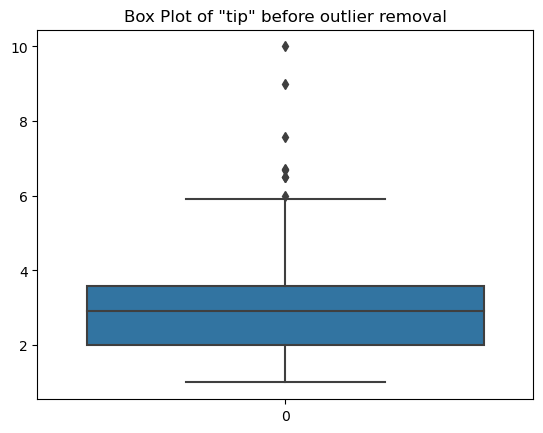

In [106]:
# box plot before outlier removal

sns.boxplot(df['tip'])
plt.title('Box Plot of "tip" before outlier removal')

In [107]:
# calculating the 1st quarile, 2nd quartile, Inter-Quartile range, upper and lower whiskers 

q1 = df['tip'].quantile(0.25)
q3 = df['tip'].quantile(0.75)
iqr = q3-q1

lower_whisker = q1 - (1.5*iqr)
upper_whisker = q3 + (1.5*iqr)

In [108]:
df_out = df.loc[(df['tip'] < upper_whisker) & (df['tip'] > lower_whisker)]

<Axes: >

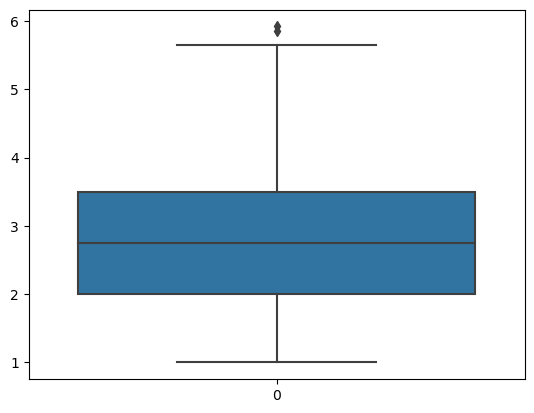

In [109]:
# box plot before outlier removal

sns.boxplot(df_out['tip'])

- As we can see, almost all outliers are removed

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [114]:
# encoding the columns using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# fetching 5 random sample records
df.sample(5)

,total_bill,tip,size,total_bill_tranformed,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
222,8.58,1.92,1,2.149434,True,True,False,False,False,True
53,9.94,1.56,2,2.296567,True,False,False,True,False,False
102,44.30,2.50,3,3.790985,False,True,True,False,False,False
92,5.75,1.00,2,1.749200,False,True,False,False,False,False
194,16.58,4.00,2,2.808197,True,True,False,False,True,True


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [121]:
# the range of an attribute is its maximum value minus its minimum value. 

total_bill_range = df['total_bill'].max() - df['total_bill'].min()
print('Range of "total_bill" : ', total_bill_range)

Range of "total_bill" :  47.74


In [117]:
min_max_scaler = MinMaxScaler()

In [122]:
# transforming the total bill column using MinMaxScaler approach
df['total_bill_mms'] = min_max_scaler.fit_transform(df[['total_bill']])

In [124]:
total_bill_range_transf = df['total_bill_mms'].max() - df['total_bill_mms'].min()
print('Range of "total_bill" after transformation : ', total_bill_range_transf)

Range of "total_bill" after transformation :  0.9999999999999999


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [125]:
tips_df = pd.read_csv('tips.csv')
tips_df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [126]:
# encoding tips_df using one-hot encoding

tips_df = pd.get_dummies(tips_df, drop_first=True)
tips_df.sample(5)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
8,15.04,1.96,2,True,False,False,True,False,False
36,16.31,2.00,3,True,False,True,False,False,False
70,12.02,1.97,2,True,False,True,False,False,False
75,10.51,1.25,2,True,False,True,False,False,False
134,18.26,3.25,2,False,False,False,False,True,True


In [132]:
# Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

X = tips_df.drop('tip', axis=1)
y = tips_df['tip']

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [137]:
# split the dataset into testing and training data

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

# transforming X_test and X_train

X_train.iloc[:, :2] = min_max_scaler.fit_transform(X_train.iloc[:, :2])
X_test.iloc[:, :2] = min_max_scaler.fit_transform(X_test.iloc[:, :2])

In [138]:
X_train.iloc[:, :2].sample(5)

,total_bill,size
147,0.135819,0.2
18,0.249001,0.4
61,0.178873,0.2
96,0.477807,0.2
224,0.170217,0.2


In [139]:
X_test.iloc[:, :2].sample(5)

,total_bill,size
43,0.156339,0.2
72,0.562677,0.2
126,0.128903,0.2
93,0.313387,0.2
198,0.234863,0.2


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [140]:
# training a linear regression model

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [142]:
# prediction using X_test

pred = linear_regression.predict(X_test)

In [143]:
print('The r_squared value of the prediction on the test data :', r2_score(y_test, pred))

The r_squared value of the prediction on the test data : 0.46051833382154306


### Happy Learning:)